In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


total_bedrooms column has 207 districts with missing value

All attributes are numberical, except the ocean_proximity

## Dataset Overview

The dataset contains **20640 rows** and **10 columns**, representing houses summary stats found in a given California district . Each row corresponds to a single district, and the columns capture location, capacity, and financial details, along with median house value.

---

### Column Descriptions

| Column Name         | Description |
|---------------------|-------------|
| **longitude**          | A measure of how far west a house is; a higher value is farther west. |
| **latitude**   | A measure of how far north a house is; a higher value is farther north. |
| **housingMedianAge**       | Median age of a house within a district; a lower number is a newer building. |
| **totalRooms**          | Total number of rooms within a district. |
| **totalBedrooms**        | Total number of bedrooms within a district. |
| **population** | Total number of people residing within a district. |
| **households**       | Total number of households, a group of people residing within a home unit, for a block. |
| **medianIncome**   | Median income for households within a block of houses (measured in tens of thousands of US Dollars). |
| **medianHouseValue**   | Median house value for households within a block (measured in US Dollars). |
| **oceanProximity**   |  Location of the house w.r.t ocean/sea. |

---

total_bedrooms column has 207 districts with missing value

All attributes are numberical, except the ocean_proximity

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Create a test set to avoid bias

In [5]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42,stratify=None)

In [6]:
#Bin values into discrete intervals
df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

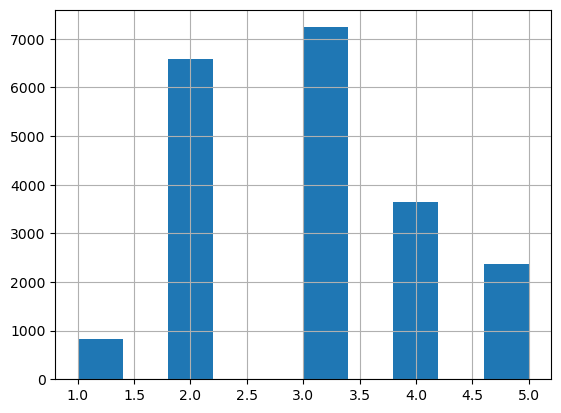

In [7]:
df['income_cat'].hist()

Stratified sampling based on income category

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)  # Provides train/test indices to split data in train/test sets.
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [9]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [10]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

The proportion of each class is same in train and test set and it is also same in df

In [11]:
#remove the income_cat attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## EDA

In [12]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

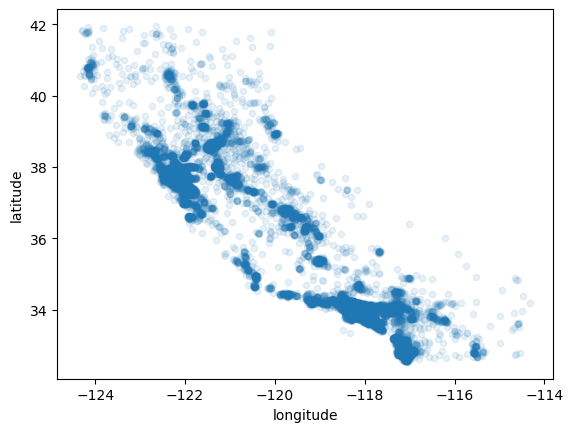

In [13]:
#visualize the geographical data
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [14]:
#correlation
corr_matrix = housing.drop('ocean_proximity',axis=1).corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


<AxesSubplot:>

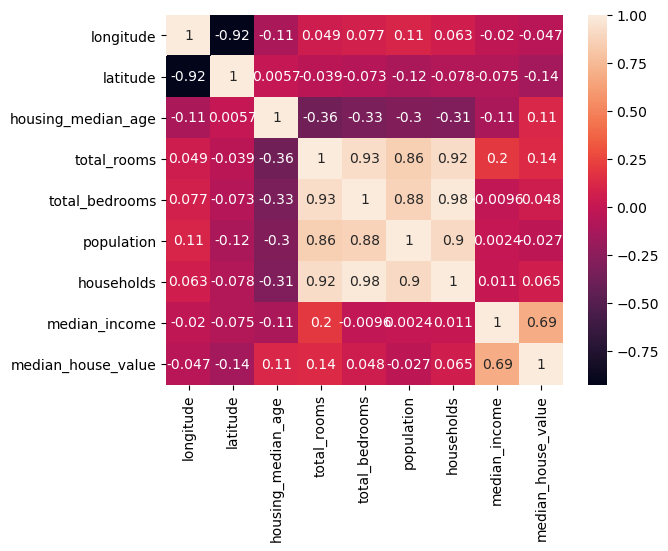

In [15]:
sns.heatmap(corr_matrix,annot=True)

Small negative correlation between the latitude and the median house value(prices have a slight tendency to go down when go north)

In [16]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

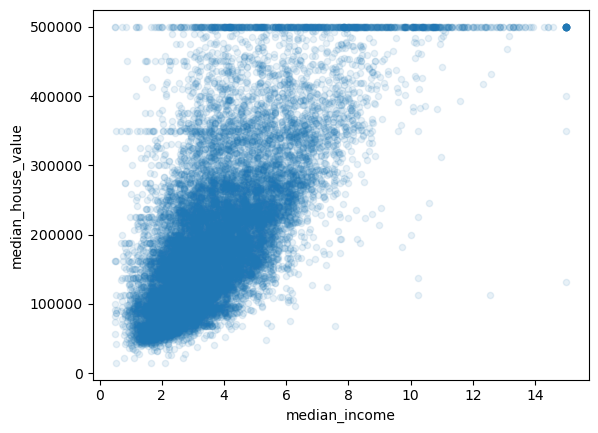

In [17]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

There's a strong correlation between median house value and median income with an obvious upper trend

In [18]:
housing = strat_train_set.drop("median_house_value", axis=1)     #drop copy the orignal datframe into housing
housing_labels = strat_train_set["median_house_value"].copy()    # splitting the predictor and  target variable

Data Cleaning

In [19]:
#total_bedrooms column has missing value
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].median())

In [20]:
#handle categorical attribute
housing = pd.get_dummies(housing,columns=['ocean_proximity'])

In [21]:
#create new features
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedroom_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16512 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   median_income               16512 non-null  float64
 8   ocean_proximity_<1H OCEAN   16512 non-null  bool   
 9   ocean_proximity_INLAND      16512 non-null  bool   
 10  ocean_proximity_ISLAND      16512 non-null  bool   
 11  ocean_proximity_NEAR BAY    16512 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  16512 non-null  bool   
 13  rooms_per_household         1651

## Model selection and training

In [27]:
#Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(housing, housing_labels)

LinearRegression()

In [28]:
#Measure performance on training data
from sklearn.metrics import mean_squared_error
house_train_pred = lr.predict(housing)

lr_train_mse = mean_squared_error(housing_labels,house_train_pred)
lr_train_rmse = np.sqrt(lr_train_mse)
print('RMSE:',lr_train_rmse)
print('R-Squared:',lr.score(housing,housing_labels))

RMSE: 68627.87390018745
R-Squared: 0.6481553634454353


In [29]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(housing, housing_labels)
house_train_pred = tree.predict(housing)

tree_train_mse = mean_squared_error(housing_labels,house_train_pred)
tree_train_rmse = np.sqrt(tree_train_mse)
print('RMSE:',tree_train_rmse)
print('R-Squared:',tree.score(housing,housing_labels))

RMSE: 0.0
R-Squared: 1.0


R squared is 1 shows the moddel overfitting

Cross Validation to reduce overfitting

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree,housing,housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_train_rmse_scores = np.sqrt(-scores)

In [31]:
print(tree_train_rmse_scores)
print("Mean:", tree_train_rmse_scores.mean())
print("Standard deviation:", tree_train_rmse_scores.std())

[72401.28931665 70701.90977136 68408.43921231 71623.62922188
 71282.34711239 77018.59208978 70534.77263033 72753.82061842
 68588.84056335 70418.35477568]
Mean: 71373.19953121436
Standard deviation: 2313.2722765184712


In [32]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(housing,housing_labels)

#cross validation
scores=cross_val_score(rf,housing,housing_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

#performance
print(forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())
print("Standard deviation:", forest_rmse_scores.std())

[51651.29093761 49206.51673902 47074.01090849 51692.09921678
 47095.28726996 51855.75185745 52412.86723677 50199.43868827
 48343.58958264 53991.99177636]
Mean: 50352.284421336786
Standard deviation: 2235.2296334048933


## Fine-tune model

In [33]:
#grid search
from sklearn.model_selection import RandomizedSearchCV
parameters = {'n_estimators':[3,5,10,15,30],'max_features':[2,3,4,5,6,7,8]}

gridrf = RandomizedSearchCV(rf,parameters,cv=5,scoring='neg_mean_squared_error',
return_train_score=True)
gridrf.fit(housing,housing_labels)

print('n_estimators: ', gridrf.best_params_['n_estimators'])
print('max feature ', gridrf.best_params_['max_features'])

best_score = np.sqrt(-gridrf.best_score_)
print('Score: ', best_score)         

n_estimators:  30
max feature  8
Score:  49931.58682818184


Obtained the lowest RMSE by setting the max features at 8 and n estimator at 30

The RMSE is 49932 which is better than default parameter and also linear regression and decision tree

In [35]:
#feature importance
importances = gridrf.best_estimator_.feature_importances_
importances_df = pd.DataFrame({'Featue':housing.columns,'Importance':importances}).sort_values(by='Importance',ascending=False)
importances_df

,Featue,Importance
7,median_income,0.354660
9,ocean_proximity_INLAND,0.167006
15,population_per_household,0.111425
0,longitude,0.071753
13,rooms_per_household,0.064369
1,latitude,0.062164
14,bedroom_per_room,0.050775
2,housing_median_age,0.043754
3,total_rooms,0.016455
4,total_bedrooms,0.015114


In [43]:
strat_test_set = test_set.dropna(subset=['total_bedrooms'])

In [44]:
X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [45]:
X_test = X_test.dropna(subset=['total_bedrooms'])
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3921 entries, 9658 to 3665
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3921 non-null   float64
 1   latitude            3921 non-null   float64
 2   housing_median_age  3921 non-null   float64
 3   total_rooms         3921 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          3921 non-null   float64
 6   households          3921 non-null   float64
 7   median_income       3921 non-null   float64
 8   ocean_proximity     3921 non-null   object 
dtypes: float64(8), object(1)
memory usage: 306.3+ KB


In [46]:
X_test = pd.get_dummies(X_test, columns=['ocean_proximity'])

In [47]:
X_test['rooms_per_household']=X_test['total_rooms']/X_test['households']
X_test['bedroom_per_room'] = X_test['total_bedrooms']/X_test['total_rooms']
X_test['population_per_household'] = X_test['population']/X_test['households']

In [48]:
final_model = gridrf.best_estimator_
final_predctions = final_model.predict(X_test)

final_rmse = np.sqrt(np.mean(final_predctions-y_test)**2)
print('RMSE on test set:',final_rmse)

RMSE on test set: 321.36673467652787


Obtained RMSE 321 on test set